In [45]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Shivalik Ghosh/Desktop/TRAIN.csv")
df

,AT,V,AP,RH,PE
0,22.85,60.29,1017.29,61.92,448.58
1,11.75,35.76,1018.99,57.92,473.01
2,12.24,44.90,1020.31,82.22,464.25
3,13.43,40.10,1015.82,87.90,471.77
4,4.65,35.19,1018.23,94.78,489.36
...,...,...,...,...,...
7995,18.74,45.09,1014.24,41.54,456.25
7996,15.43,40.89,1010.63,73.03,468.35
7997,12.36,52.75,1026.04,68.71,465.14
7998,25.98,73.18,1012.28,85.78,439.73


In [3]:
df.shape

(8000, 5)

In [4]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.843584,-0.505347,-0.538296,-0.947350
V,0.843584,1.000000,-0.409484,-0.308251,-0.869313
AP,-0.505347,-0.409484,1.000000,0.100138,0.515031
RH,-0.538296,-0.308251,0.100138,1.000000,0.385353
PE,-0.947350,-0.869313,0.515031,0.385353,1.000000


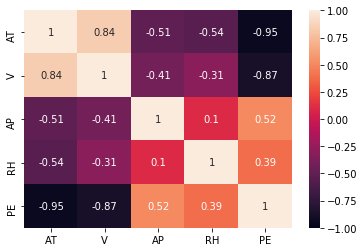

In [6]:
sns.heatmap(df.corr(), annot = True, vmin = -1 )
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8000 non-null   float64
 1   V       8000 non-null   float64
 2   AP      8000 non-null   float64
 3   RH      8000 non-null   float64
 4   PE      8000 non-null   float64
dtypes: float64(5)
memory usage: 312.6 KB


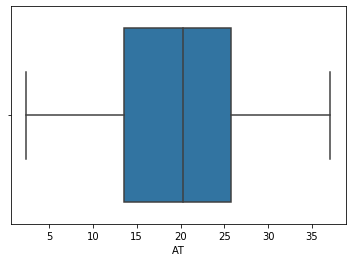

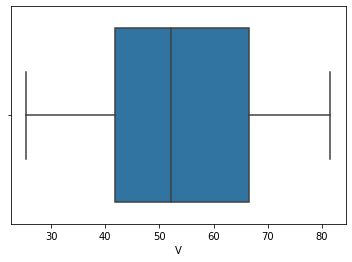

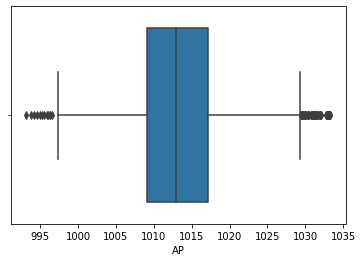

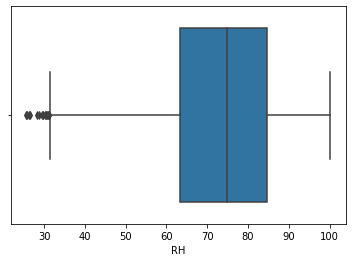

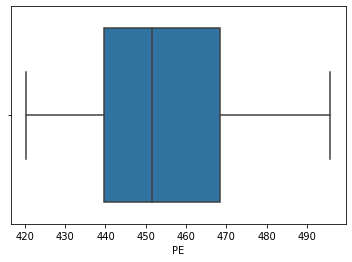

In [8]:
for i in df :
    sns.boxplot(df[i]) 
    plt.show()

In [9]:
Outliers = ['AP','RH']

In [10]:
for i in Outliers :
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    
    IQR = Q3 - Q1 
    
    LL = Q1 - (1.5*IQR)
    UL = Q3 + (1.5*IQR)
    
    df.drop(df[(df[i] > UL) | (df[i] < LL)].index, inplace = True)

In [11]:
df.shape

(7919, 5)

In [12]:
from sklearn.preprocessing import PowerTransformer 

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('PE', axis = 1)

In [17]:
y = df.PE

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3, random_state= 42) 

In [19]:
import statsmodels.api as sm

In [20]:
pt = PowerTransformer()

In [21]:
X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

In [28]:
Xc = sm.add_constant(X_train_pt)

In [29]:
model1 = sm.OLS(y_train, Xc).fit()

In [30]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.743e+04
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:27:26   Log-Likelihood:                -16353.
No. Observations:                5543   AIC:                         3.272e+04
Df Residuals:                    5538   BIC:                         3.275e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.1653      0.062   7308.850      0.000     454.043     454.287
x1           -14.2698      0.154    -92.647      0.000     -14.572     -13.968
x2            -3.2472      0.126    -25.839      0.000      -3.494      -3.001
x3             0.4816      0.075      6.433      0.000       0.335       0.628
x4            -2.1150      0.080    -26.318      0.000      -2.273      -1.957
==============================================================================
Omnibus:                      878.150   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5542.137
Skew:                          -0.602   Prob(JB):                         0.00
Kurtosis:                       7.749   Cond. No.                         4.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rfr = RandomForestRegressor(random_state = 42)

In [36]:
rfr.fit(X_train_pt, y_train)

RandomForestRegressor(random_state=42)

In [49]:
Test = pd.read_csv("C:/Users/Shivalik Ghosh/Desktop/TEST.csv")
Test

,AT,V,AP,RH
0,11.55,40.60,1014.44,87.06
1,6.61,38.91,1015.77,92.31
2,16.97,42.86,1013.92,74.80
3,21.90,57.76,1017.45,66.89
4,9.73,40.22,1011.48,87.88
...,...,...,...,...
1563,17.37,58.49,1012.20,91.14
1564,21.50,59.87,1019.05,76.56
1565,8.84,42.49,1010.28,89.09
1566,21.06,50.59,1016.42,66.12


In [39]:
Test_pt = pt.fit_transform(Test)

C:\Users\Shivalik Ghosh\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3234: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [40]:
Test_pt

array([[-1.06609601, -1.09914704,  0.        ,  0.93853634],
       [-1.73078024, -1.27269053,  0.        ,  1.37312542],
       [-0.33937122, -0.87702371,  0.        ,  0.00462351],
       ...,
       [-1.43038833, -0.91265108,  0.        ,  1.10413705],
       [ 0.20777059, -0.19015522,  0.        , -0.58667156],
       [-1.41020456, -1.51463952,  0.        , -0.1939123 ]])

In [54]:
y_pred = rfr.predict(Test_pt)
y_pred.shape

(1568,)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
df_submit2 = pd.DataFrame()


In [63]:
df_submit2['Index'] = list(range(0,1568))

In [64]:
df_submit2

,Index
0,0
1,1
2,2
3,3
4,4
...,...
1563,1563
1564,1564
1565,1565
1566,1566


In [65]:
df_submit2['Value'] = y_pred
df_submit2.to_csv('PowerPlantProject1.csv', index = False)
df_submit2.head(5) 

,Index,Value
0,0,475.0239
1,1,485.0366
2,2,462.4822
3,3,448.5233
4,4,477.2822
